In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [68]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')


Shape of X: (284807, 29)
Shape of y: (284807, 1)
Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364, 1)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443, 1)


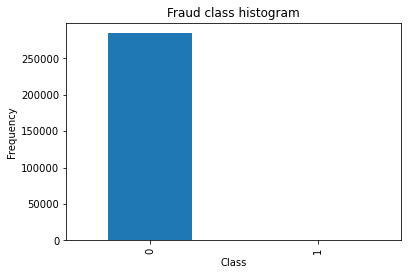

In [69]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data.head(3)
pd.value_counts(data['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts()
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

In [70]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train.ravel())

Before OverSampling, counts of label '1': [345]
Before OverSampling, counts of label '0': [199019] 

After OverSampling, the shape of train_X: (398038, 29)
After OverSampling, the shape of train_y: (398038,) 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019
Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

NEURAL NETWORK FUNCTION:

In [71]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from statistics import stdev

2.4.1


In [72]:
def callf3(xx,yy,xt,yt):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])
    model.fit(xx, yy.ravel() , epochs=4)
    ls=[]
    test_loss, test_acc = model.evaluate(xt,  yt, verbose=2)
    print('\nTest accuracy:', test_acc)
    tr_loss, tr_acc = model.evaluate(xx,  yy, verbose=2)
    ls.append(test_acc)
    ls.append(tr_acc)
    ypr=model.predict(xt)
    ypr=(ypr>0.3)*1
    ypre= np.ravel(ypr)
    ls.append(f1_score(yt, ypre))
    return ls

NEURAL NETWORK ON NON OVERSAMPLED DATA:

In [73]:
ste=[]
sta=[]
sf=[]
for i in range(30):
    r=callf3(X_train,y_train,X_test,  y_test.ravel())
    ste.append(r[0])
    sta.append(r[1])
    sf.append(r[2])

Epoch 1/4
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0157 - accuracy: 0.9984
Epoch 2/4
6231/6231 [==============================] - 19s 3ms/step - loss: 0.0013 - accuracy: 0.9990
Epoch 3/4
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0013 - accuracy: 0.9991
Epoch 4/4
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0011 - accuracy: 0.9993
2671/2671 - 4s - loss: 0.0011 - accuracy: 0.9991

Test accuracy: 0.9991222023963928
6231/6231 - 13s - loss: 0.0011 - accuracy: 0.9992
Epoch 1/4
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0176 - accuracy: 0.9984
Epoch 2/4
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0012 - accuracy: 0.9991
Epoch 3/4
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0011 - accuracy: 0.9992
Epoch 4/4
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0011 - accuracy: 0.9993
2671/2671 - 4s - loss: 9.6774e-04 - accuracy: 0.99

6231/6231 [==============================] - 18s 3ms/step - loss: 0.0180 - accuracy: 0.9983
Epoch 2/4
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0014 - accuracy: 0.9990
Epoch 3/4
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0011 - accuracy: 0.9993
Epoch 4/4
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0012 - accuracy: 0.9991
2671/2671 - 4s - loss: 0.0014 - accuracy: 0.9993

Test accuracy: 0.9992977976799011
6231/6231 - 12s - loss: 0.0014 - accuracy: 0.9993
Epoch 1/4
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0220 - accuracy: 0.9977
Epoch 2/4
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0012 - accuracy: 0.9992
Epoch 3/4
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0013 - accuracy: 0.9990
Epoch 4/4
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0010 - accuracy: 0.9994
2671/2671 - 4s - loss: 0.0014 - accuracy: 0.9991

Test accur

In [74]:
sum(sta)/30

0.9992716828982036

In [75]:
sum(ste)/30

0.9992451111475626

In [180]:
sum(sf)/30

0.7985623931494493

In [77]:
max(sta)

0.9994683265686035

In [78]:
max(ste)

0.9994031190872192

In [79]:
max(sf)

0.823943661971831

In [181]:
stdev(sta)

0.00015670637222021803

In [182]:
stdev(ste)

0.00016533650048718225

In [183]:
stdev(sf)

0.03398862360777715

NEURAL NETWORK ON SMOTE OVERSAMPLED DATA:

In [83]:
ste2=[]
sta2=[]
sf2=[]
for i in range(30):
    r=callf3(X_train_res, y_train_res.ravel(),X_test,  y_test.ravel())
    ste2.append(r[0])
    sta2.append(r[1])
    sf2.append(r[2])

Epoch 1/4
12439/12439 [==============================] - 37s 3ms/step - loss: 0.0699 - accuracy: 0.9796
Epoch 2/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0062 - accuracy: 0.9991
Epoch 3/4
12439/12439 [==============================] - 37s 3ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 4/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0024 - accuracy: 0.9994
2671/2671 - 4s - loss: 0.0014 - accuracy: 0.9989

Test accuracy: 0.9989232420921326
12439/12439 - 19s - loss: 0.0014 - accuracy: 0.9997
Epoch 1/4
12439/12439 [==============================] - 37s 3ms/step - loss: 0.0751 - accuracy: 0.9781
Epoch 2/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0061 - accuracy: 0.9991
Epoch 3/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 4/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0022 - accuracy: 0.9995
2671/2671 - 4s - loss: 0.0017 - 


Test accuracy: 0.998747706413269
12439/12439 - 18s - loss: 0.0014 - accuracy: 0.9996
Epoch 1/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0623 - accuracy: 0.9821
Epoch 2/4
12439/12439 [==============================] - 35s 3ms/step - loss: 0.0048 - accuracy: 0.9991
Epoch 3/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0026 - accuracy: 0.9993
Epoch 4/4
12439/12439 [==============================] - 35s 3ms/step - loss: 0.0020 - accuracy: 0.9994
2671/2671 - 4s - loss: 0.0013 - accuracy: 0.9989

Test accuracy: 0.9988998770713806
12439/12439 - 18s - loss: 0.0011 - accuracy: 0.9997
Epoch 1/4
12439/12439 [==============================] - 35s 3ms/step - loss: 0.0700 - accuracy: 0.9794
Epoch 2/4
12439/12439 [==============================] - 35s 3ms/step - loss: 0.0054 - accuracy: 0.9991
Epoch 3/4
12439/12439 [==============================] - 35s 3ms/step - loss: 0.0028 - accuracy: 0.9993
Epoch 4/4
12439/12439 [===========================

12439/12439 [==============================] - 36s 3ms/step - loss: 0.0023 - accuracy: 0.9995
2671/2671 - 4s - loss: 0.0014 - accuracy: 0.9987

Test accuracy: 0.998747706413269
12439/12439 - 19s - loss: 0.0018 - accuracy: 0.9995


In [84]:
sum(sf2)/30

0.6589826974772058

In [85]:
sum(sta2)/30

0.9995071649551391

In [86]:
sum(ste2)/30

0.9988050540288289

In [87]:
max(sf2)

0.6892655367231638

In [88]:
max(sta2)

0.9996960163116455

In [89]:
max(ste2)

0.9989349842071533

In [90]:
stdev(sf2)

0.019244541402913137

In [91]:
stdev(sta2)

0.00023619760274616394

In [92]:
stdev(ste2)

9.005196177086474e-05

In [93]:
save=1

In [33]:
progress=1

In [7]:
X_oversampled=X_train_res[199365:]

In [8]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [9]:
torch.cuda.empty_cache()

In [10]:
def get_generator_block(input_dim, output_dim):
    return nn.Sequential(
        nn.Linear(input_dim, output_dim),
        nn.BatchNorm1d(output_dim),
        nn.ReLU(inplace=True),
    )

In [11]:
class Generator(nn.Module):

    def __init__(self, z_dim=29, im_dim=29, hidden_dim=128):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            get_generator_block(z_dim, hidden_dim),
            get_generator_block(hidden_dim, hidden_dim * 2),
            get_generator_block(hidden_dim * 2, hidden_dim * 4),
            get_generator_block(hidden_dim * 4, hidden_dim * 8),
            nn.Linear(hidden_dim * 8, im_dim),
            nn.Sigmoid()
        )
    def forward(self, noise):
        return self.gen(noise)
    
    # Needed for grading
    def get_gen(self):

        return self.gen

In [12]:
def get_discriminator_block(input_dim, output_dim):
    return nn.Sequential(
        nn.Linear(input_dim, output_dim),
        nn.LeakyReLU(0.2, inplace=True)        
    )

In [13]:
class Discriminator(nn.Module):
    def __init__(self, im_dim=29, hidden_dim=128):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            get_discriminator_block(im_dim, hidden_dim * 4),
            get_discriminator_block(hidden_dim * 4, hidden_dim * 2),
            get_discriminator_block(hidden_dim * 2, hidden_dim),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, image):

        return self.disc(image)
    
    def get_disc(self):

        return self.dis

In [14]:
X_oversampled = torch.from_numpy(X_oversampled)

In [15]:
X_oversampled.shape

torch.Size([198673, 29])

In [16]:
criterion = nn.BCEWithLogitsLoss()
n_epochs = 200
z_dim = 29
batch_size = 128
lr = 0.00001
display_step = 500
device = 'cuda'

In [17]:
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator().to(device) 
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

In [18]:
def get_disc_loss(gen, disc, criterion, real, device):

    fake = gen(X_oversampled.float().to(device))
    disc_fake_pred = disc(fake.detach())
    disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
    disc_real_pred = disc(real)
    disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))
    disc_loss = (disc_fake_loss + disc_real_loss) / 2
    return disc_loss

In [19]:
def get_gen_loss(gen, disc, criterion, num_images, z_dim, device):
    fake_images = gen(X_oversampled.float().to(device))
    
    disc_fake_pred = disc(fake_images)
    gen_loss = criterion(disc_fake_pred, torch.ones_like(disc_fake_pred))
    return gen_loss

In [20]:
y_tr=y_train.ravel()

In [21]:
li=[]
for i in range(len(y_tr)):
    if int(y_tr[i])==1:
        li.append(X_train[i])

In [22]:
X_real=np.array(li)

In [23]:
X_real.shape

(345, 29)

In [24]:
li2=[1]*345

In [25]:
y_real=np.array(li2)
y_real.shape

(345,)

In [26]:
from torch.utils.data import TensorDataset, DataLoader
tensor_x = torch.Tensor(X_real) 
tensor_y = torch.Tensor(y_real)
my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset

In [27]:
dataloader = DataLoader(
    my_dataset,
    batch_size=batch_size,
    shuffle=True)

In [28]:

cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
test_generator = True 
gen_loss = False
error = False
for epoch in range(n_epochs):
  
    # Dataloader returns the batches
    for real, _ in tqdm(dataloader):
        cur_batch_size = len(real)

        # Flatten the batch of real images from the dataset
        real = real.view(cur_batch_size, -1).to(device)

        ### Update discriminator ###
        # Zero out the gradients before backpropagation
        disc_opt.zero_grad()

        # Calculate discriminator loss
        disc_loss = get_disc_loss(gen, disc, criterion, real, device)

        # Update gradients#
        disc_loss.backward(retain_graph=True)

        # Update optimizer
        disc_opt.step()

        # For testing purposes, to keep track of the generator weights
        if test_generator:
            old_generator_weights = gen.gen[0][0].weight.detach().clone()

        ### Update generator ###
        #     Hint: This code will look a lot like the discriminator updates!
        #     These are the steps you will need to complete:
        #       1) Zero out the gradients.
        #       2) Calculate the generator loss, assigning it to gen_loss.
        #       3) Backprop through the generator: update the gradients and optimizer.
        #### START CODE HERE ####
        gen_opt.zero_grad()
        gen_loss = get_gen_loss(gen, disc, criterion, cur_batch_size, z_dim, device)
        gen_loss.backward()
        gen_opt.step()        
        #### END CODE HERE ####

        # For testing purposes, to check that your code changes the generator weights
        if test_generator:
            try:
                assert lr > 0.0000002 or (gen.gen[0][0].weight.grad.abs().max() < 0.0005 and epoch == 0)
                assert torch.any(gen.gen[0][0].weight.detach().clone() != old_generator_weights)
            except:
                error = True
                print("Runtime tests have failed")

        # Keep track of the average discriminator loss
        mean_discriminator_loss += disc_loss.item() / display_step

        # Keep track of the average generator loss
        mean_generator_loss += gen_loss.item() / display_step

        ### Visualization code ###
        if cur_step % display_step == 0 and cur_step > 0:
            print(f"Epoch {epoch}, step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            #fake_noise = get_noise(cur_batch_size, z_dim, device=device)
            #fake = gen(fake_noise)
            #show_tensor_images(fake)
            #show_tensor_images(real)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 166, step 500: Generator loss: 0.7789288949966432, discriminator loss: 0.43253318679332753


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [29]:
res=gen(X_oversampled.float().to(device))

In [30]:
res

tensor([[0.0281, 0.0564, 0.0365,  ..., 0.0348, 0.0370, 0.0270],
        [0.0319, 0.0395, 0.0477,  ..., 0.0362, 0.0408, 0.0274],
        [0.0284, 0.1889, 0.0350,  ..., 0.0336, 0.0474, 0.0300],
        ...,
        [0.0351, 0.0438, 0.0413,  ..., 0.0360, 0.0388, 0.0334],
        [0.0271, 0.0368, 0.0530,  ..., 0.0496, 0.0522, 0.0216],
        [0.0339, 0.0598, 0.0516,  ..., 0.0467, 0.0528, 0.0243]],
       device='cuda:0', grad_fn=<SigmoidBackward>)

In [31]:
X_oversampled

tensor([[-5.4826e+00,  4.7820e+00, -9.2109e+00,  ...,  2.1889e-02,
         -7.3584e-01, -3.5323e-01],
        [-9.6603e+00,  7.2194e+00, -1.6664e+01,  ..., -1.1515e+00,
         -2.9433e-01,  2.7495e-01],
        [ 1.2496e+00,  2.6734e+00, -5.3041e+00,  ...,  4.7087e-01,
          2.7877e-01, -3.4707e-01],
        ...,
        [-5.2293e+00,  5.1671e+00, -8.3084e+00,  ...,  1.8686e+00,
          7.5218e-01,  8.5318e-01],
        [-2.9057e+01,  1.6114e+01, -2.9913e+01,  ...,  1.2786e+00,
          3.7094e-01,  4.6539e-02],
        [ 1.1410e+00,  1.2332e+00, -1.4495e+00,  ...,  1.0101e-01,
          1.2334e-01, -3.4923e-01]], dtype=torch.float64)

In [32]:
fres=res.cpu().detach().numpy()
fres.shape

(198673, 29)

GAN+SMOTE DATA

In [33]:
fin=np.concatenate((X_train_res[:199365], fres), axis=0)

In [34]:
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [35]:
Xn,yn=shuffle_in_unison(fin, y_train_res)


NEURAL NETWORK ON GAN+SMOTE DATA

In [94]:
ste3=[]
sta3=[]
sf3=[]
for i in range(30):
    r=callf3(Xn, yn.ravel(),X_test,  y_test.ravel())
    ste3.append(r[0])
    sta3.append(r[1])
    sf3.append(r[2])

Epoch 1/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0215 - accuracy: 0.9915
Epoch 2/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 3/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 4/4
12439/12439 [==============================] - 35s 3ms/step - loss: 0.0014 - accuracy: 0.9996
2671/2671 - 4s - loss: 0.0010 - accuracy: 0.9993

Test accuracy: 0.9993094801902771
12439/12439 - 19s - loss: 0.0013 - accuracy: 0.9997
Epoch 1/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0202 - accuracy: 0.9918
Epoch 2/4
12439/12439 [==============================] - 37s 3ms/step - loss: 0.0022 - accuracy: 0.9996
Epoch 3/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 4/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0015 - accuracy: 0.9996
2671/2671 - 4s - loss: 0.0017 - 


Test accuracy: 0.9992626905441284
12439/12439 - 19s - loss: 6.3105e-04 - accuracy: 0.9997
Epoch 1/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0225 - accuracy: 0.9914
Epoch 2/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 3/4
12439/12439 [==============================] - 35s 3ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 4/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0017 - accuracy: 0.9995
2671/2671 - 4s - loss: 0.0012 - accuracy: 0.9991

Test accuracy: 0.9990754127502441
12439/12439 - 19s - loss: 0.0016 - accuracy: 0.9996
Epoch 1/4
12439/12439 [==============================] - 35s 3ms/step - loss: 0.0212 - accuracy: 0.9906
Epoch 2/4
12439/12439 [==============================] - 35s 3ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 3/4
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 4/4
12439/12439 [======================

12439/12439 [==============================] - 35s 3ms/step - loss: 0.0018 - accuracy: 0.9996
2671/2671 - 4s - loss: 0.0012 - accuracy: 0.9994

Test accuracy: 0.9993796944618225
12439/12439 - 18s - loss: 0.0019 - accuracy: 0.9997


In [173]:
sum(sf3)/30

0.8123392279906748

In [154]:
sum(sta3)/30

0.9996241549650828

In [155]:
sum(ste3)/30

0.9992045362790426

In [174]:
max(sf3)

0.8303249097472925

In [160]:
max(sta3)

0.9997135996818542

In [161]:
max(ste3)

0.999426543712616

In [175]:
stdev(sf3)

0.018074265974199775

In [162]:
stdev(sta3)

8.917027757911628e-05

In [163]:
stdev(ste3)

0.00018241705618845077

In [184]:
save=1

In [185]:
progress=1

In [ ]:
final=1